# Example of RC beam optimal design

## Requirements

 - python3
 - cma python package: install via pip https://pypi.org/project/cma/#description


In [2]:
# problem: rectangular cross-section beam
b0 = .15 # thickness
h0 = .4  # height

rec = 0.03

L = 1.5 # length
    
gamma = 25e3 # specific weight of concrete
qsc = 25e3    # N/m load

fck = 25e6
fyk = 400e6


In [3]:
# import CMA-ES package
import cma
from math import sqrt

In [4]:
def structAnalysis(x):
    
    b = x[0]
    h = x[1]
    
    qpp = b * h * gamma
    print(qpp)
    Moment = (qsc + qpp) * L**2.0 / 8.0
    return Moment

In [5]:
def steelDesign(x,M):
    fcd = fck/1.5
    fyd = fyk/1.15
      
    b = x[0]
    h = x[1]
    d = h-rec

    Md   = M
    Mcrd = 0.251 * b * d**2 * fcd

    mud = Md/(b*d**2*fcd)
    
    if Md < Mcrd:

        omega_pos = (-1+sqrt(1-4*(-1/1.7)*(-mud)) ) / (2*(-1/1.7))
        omega_neg = (-1-sqrt(1-4*(-1/1.7)*(-mud)) ) / (2*(-1/1.7))
        omega = omega_neg 

        Ast = omega * b*d*fcd / fyd
        Asc = 0.0
    else:
        DeltaM = Md - Mcrd
        Asc = DeltaM / ( (d-rec)*fyd )
        Ast = 0.306 * b * d * fcd / fyd + DeltaM / ( (d-rec)*fyd ) 
    return Ast, Asc

In [6]:
def costFun(x):
    
    M = structAnalysis(x)
    
    # compute steel area
    Ast, Asc = steelDesign( x, M)
    
    print("x: ", x, " / Ast: ", Ast , " Asc: ", Asc)

    # compute cost
    f = L * ( Ast + Asc )
    return f

In [7]:

x0 = [b0, h0]  # initial solution

M=structAnalysis(x0)

print("moment: ", M)

Ast,Asc = steelDesign(x0,M)
print("Steel: Ast: ", Ast , " Asc: ", Asc)

fun = costFun  # we could use `functools.partial(cma.ff.elli, cond=1e4)` to change the condition number to 1e4
sigma0 = .01    # initial standard deviation to sample new solutions
xopt, es = cma.fmin2(fun, x0, sigma0, {'bounds': [ [.1, .1], None]} )

1500.0
moment:  7453.125
Steel: Ast:  0.004462263209147363  Asc:  0.0
(3_w,6)-aCMA-ES (mu_w=2.0,w_1=63%) in dimension 2 (seed=202845, Wed May  3 10:46:33 2023)
1320.6120868284775
x:  [0.13906096 0.37986567]  / Ast:  0.003901369644998839  Asc:  0.0
1513.7042284953193
x:  [0.15180852 0.39884565]  / Ast:  0.004502286594207318  Asc:  0.0
1496.089457837625
x:  [0.14733738 0.40616698]  / Ast:  0.004457010243783267  Asc:  0.0
1374.2444676142984
x:  [0.13291364 0.41357514]  / Ast:  0.0040965757858987895  Asc:  0.0
1464.5660615789222
x:  [0.15117493 0.38751559]  / Ast:  0.0043419190657073  Asc:  0.0
1486.1532081565815
x:  [0.14707523 0.40418858]  / Ast:  0.0044249828367943  Asc:  0.0
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      6 5.852054467498259e-03 1.0e+00 1.29e-02  1e-02  2e-02 0:00.0
1644.2295894452682
x:  [0.16672508 0.39447684]  / Ast:  0.004890180053139553  Asc:  0.0
1225.6865433023584
x:  [0.13046587 0.37578764]  / Ast:  0.0036124838296557747  Asc:

406.6394013832775
x:  [0.10206671 0.15936221]  / Ast:  0.0001936061363325497  Asc:  8.719632813175791e-09
406.5455807217849
x:  [0.10202532 0.15939007]  / Ast:  0.00019356336488820546  Asc:  2.7712642687837914e-09
406.62899684379164
x:  [0.10206065 0.15936759]  / Ast:  0.00019359768706187432  Asc:  3.708315469510271e-09
406.48489410244053
x:  [0.10200108 0.15940416]  / Ast:  0.00019354205441020808  Asc:  6.387678799803145e-09
406.633218701915
x:  [0.10206385 0.15936424]  / Ast:  0.0001936030017761542  Asc:  7.95655762653714e-09
406.5904414234923
x:  [0.10204448 0.15937773]  / Ast:  0.00019358222873821246  Asc:  3.7511746561102254e-09
406.5234677342756
x:  [0.10201768 0.15939333]  / Ast:  0.00019355861963441654  Asc:  7.634708807556414e-09
406.3956114298364
x:  [0.10196171 0.15943067]  / Ast:  0.00019350136750666028  Asc:  7.497014590358587e-10
406.5295356061142
x:  [0.10202071 0.15939098]  / Ast:  0.00019356227635470639  Asc:  9.064855414423137e-09
406.65066924331455
x:  [0.10207311 0.

403.89630292453165
x:  [0.10091568 0.16009258]  / Ast:  0.00019249804678814423  Asc:  3.1510763156603913e-09
403.9456710160309
x:  [0.10093867 0.16007569]  / Ast:  0.00019252385004517867  Asc:  1.0110404339551799e-08
404.0704701282923
x:  [0.10098977 0.16004412]  / Ast:  0.00019257133791786168  Asc:  6.882902179279037e-09
404.02512437479515
x:  [0.10097005 0.16005741]  / Ast:  0.00019255117485188328  Asc:  4.6413645860795425e-09
404.2405522638542
x:  [0.10106046 0.15999949]  / Ast:  0.00019263865362539125  Asc:  5.540000479354105e-09
404.2726453692131
x:  [0.10107819 0.15998413]  / Ast:  0.0001926624545205084  Asc:  1.831557230071603e-08
403.88767620461437
x:  [0.1009107  0.16009706]  / Ast:  0.0008768305955457054  Asc:  0.0
403.99333616532994
x:  [0.10096054 0.16005989]  / Ast:  0.00019254795159966126  Asc:  1.587777808410829e-08
403.96942622372217
x:  [0.10095014 0.16006691]  / Ast:  0.00019253730532731693  Asc:  1.4679095725552374e-08
403.86910690566646
x:  [0.10090373 0.16010077]  

403.20367062798766
x:  [0.10062529 0.16027926]  / Ast:  0.00019221679555507995  Asc:  3.9049831495262466e-10
403.1959058798127
x:  [0.1006219  0.16028157]  / Ast:  0.0008755600745220812  Asc:  0.0
403.211210045153
x:  [0.10062842 0.16027727]  / Ast:  0.00019221979048457356  Asc:  3.4167852748971366e-10
403.1969253398812
x:  [0.10062256 0.16028092]  / Ast:  0.00019221432223951896  Asc:  6.761440488939317e-10
403.1976396087304
x:  [0.10062268 0.16028102]  / Ast:  0.0001922141498124188  Asc:  1.361495227032086e-10
403.21039241301764
x:  [0.10062821 0.16027727]  / Ast:  0.00019221980310761335  Asc:  7.429771039762897e-10
403.1791395696859
x:  [0.10061497 0.16028594]  / Ast:  0.00019220674908637496  Asc:  1.9520641916010153e-10
403.19341557487985
x:  [0.10062113 0.16028181]  / Ast:  0.00019221297837009383  Asc:  7.579600504624959e-10
403.1978892652152
x:  [0.10062298 0.16028063]  / Ast:  0.0001922147515049606  Asc:  7.243086458141313e-10
403.1973400869736
x:  [0.10062259 0.16028104]  / Ast:

402.7640082942499
x:  [0.10044156 0.16039735]  / Ast:  0.00019203938566667584  Asc:  2.7671269402508967e-11
402.77412835160385
x:  [0.10044596 0.16039436]  / Ast:  0.0001920438885723135  Asc:  5.274709789647951e-10
402.757252761287
x:  [0.10043907 0.16039864]  / Ast:  0.00019203749327857987  Asc:  1.0007928749994825e-09
402.7947258561187
x:  [0.100455   0.16038812]  / Ast:  0.00019205332469537418  Asc:  1.8632000775097433e-09
402.7469103903994
x:  [0.10043437 0.16040202]  / Ast:  0.000874736385759642  Asc:  0.0
402.80380941281425
x:  [0.10045927 0.16038492]  / Ast:  0.00019205818145327967  Asc:  3.2684067904825584e-09
402.82182304656527
x:  [0.10046605 0.16038127]  / Ast:  0.00019206356268605215  Asc:  1.0672052667474463e-09
402.7091512684309
x:  [0.10041766 0.16041367]  / Ast:  0.0008746723987593509  Asc:  0.0
402.78602156717386
x:  [0.10045106 0.16039094]  / Ast:  0.00019204903835081733  Asc:  9.481283171049097e-10
402.7692345749666
x:  [0.10044404 0.16039548]  / Ast:  0.000192042226

402.40985090317605
x:  [0.10029387 0.16049231]  / Ast:  0.0001918969830800688  Asc:  3.701994897863903e-10
402.41061198125163
x:  [0.10029418 0.1604921 ]  / Ast:  0.00019189728741185897  Asc:  3.6744101729050065e-10
402.4338413314258
x:  [0.10030401 0.16048564]  / Ast:  0.0001919069984003569  Asc:  7.788872145173825e-10
402.4284380563972
x:  [0.10030163 0.1604873 ]  / Ast:  0.00019190448744345792  Asc:  3.872929885574978e-10
402.4280019045277
x:  [0.10030154 0.16048726]  / Ast:  0.00019190455527325046  Asc:  6.73135707351638e-10
402.42369838827216
x:  [0.10029958 0.16048869]  / Ast:  0.00019190239443087154  Asc:  1.7236971062378338e-10
402.4152897624738
x:  [0.10029591 0.16049121]  / Ast:  0.0008741280881207399  Asc:  0.0
402.40214663248514
x:  [0.10029042 0.16049475]  / Ast:  0.0008741039776396234  Asc:  0.0
402.412881656205
x:  [0.10029518 0.16049142]  / Ast:  0.000191898322829394  Asc:  5.092422165296979e-10
402.40308423865395
x:  [0.10029065 0.16049476]  / Ast:  0.00087410663281312

402.19576546895235
x:  [0.10020402 0.16055075]  / Ast:  0.0008737268005087829  Asc:  0.0
402.12756000104304
x:  [0.10017276 0.16057361]  / Ast:  0.000873617273795009  Asc:  0.0
402.2201699420966
x:  [0.10021445 0.16054379]  / Ast:  0.0008737702409564574  Asc:  0.0
402.20207591675864
x:  [0.10020648 0.16054932]  / Ast:  0.0008737393369838735  Asc:  0.0
402.2003256311831
x:  [0.10020594 0.16054949]  / Ast:  0.0008737350848002834  Asc:  0.0
402.2136029927837
x:  [0.10021148 0.16054592]  / Ast:  0.000873759448589967  Asc:  0.0
402.233104386793
x:  [0.10021995 0.16054014]  / Ast:  0.0008737933896654827  Asc:  0.0
402.2504236368308
x:  [0.10022765 0.16053471]  / Ast:  0.00019183350413107093  Asc:  1.270028412312386e-09
402.1054126831609
x:  [0.10016204 0.16058196]  / Ast:  0.0008735849363516712  Asc:  0.0
402.07883409236797
x:  [0.10014851 0.16059304]  / Ast:  0.0008735498102714268  Asc:  0.0
402.22238769903623
x:  [0.10021541 0.16054313]  / Ast:  0.000873774115198465  Asc:  0.0
402.32759347

401.8899492233745
x:  [0.10007766 0.16063124]  / Ast:  0.00019168908734222605  Asc:  2.2916651335696605e-09
401.87967408592294
x:  [0.10007308 0.16063447]  / Ast:  0.00019168421059065127  Asc:  1.4292927921348768e-09
401.88474006366454
x:  [0.10007501 0.1606334 ]  / Ast:  0.00019168578865788594  Asc:  8.848301580671615e-10
401.89118443388236
x:  [0.1000776  0.16063183]  / Ast:  0.00019168812313971747  Asc:  5.759942136650944e-10
401.8750608605607
x:  [0.10007091 0.16063612]  / Ast:  0.00019168171217629423  Asc:  6.796535217527149e-10
401.8688819514499
x:  [0.10006798 0.16063836]  / Ast:  0.0008731250992597318  Asc:  0.0
  400   2400 2.875235877447240e-04 4.0e+02 1.00e+03  3e-06  1e-04 0:00.4
401.8923554140609
x:  [0.10007878 0.1606304 ]  / Ast:  0.00019169034863404563  Asc:  2.6335755144136504e-09
401.87066899804336
x:  [0.10006911 0.16063725]  / Ast:  0.00019168002805649434  Asc:  7.808278975576802e-10
401.8839855778441
x:  [0.10007505 0.16063303]  / Ast:  0.00019168638738341744  Asc:

401.7828654280165
x:  [0.10003219 0.16066143]  / Ast:  0.0008729667326543167  Asc:  0.0
401.7884377416231
x:  [0.1000346  0.16065979]  / Ast:  0.0001916462966613152  Asc:  9.625407451978621e-11
401.7843100699292
x:  [0.10003282 0.16066099]  / Ast:  0.0008729692303752403  Asc:  0.0
401.7896931387886
x:  [0.10003511 0.16065947]  / Ast:  0.00019164677796656358  Asc:  6.71919835265711e-11
401.78880975736706
x:  [0.10003478 0.16065965]  / Ast:  0.00019164651143246828  Asc:  1.7229699224836818e-10
401.7846861849577
x:  [0.10003301 0.16066085]  / Ast:  0.0001916447143023141  Asc:  1.406995076732743e-11
401.78856140106086
x:  [0.10003471 0.16065966]  / Ast:  0.0001916465075151344  Asc:  2.851783395253058e-10
401.7872615630123
x:  [0.10003405 0.1606602 ]  / Ast:  0.0008729746706338217  Asc:  0.0
401.7838537959507
x:  [0.10003264 0.1606611 ]  / Ast:  0.0008729683286431649  Asc:  0.0
401.787805813119
x:  [0.10003432 0.16065999]  / Ast:  0.0001916459995147863  Asc:  4.649565093593787e-11
401.78716

401.7501191865328
x:  [0.10001864 0.16067011]  / Ast:  0.0001916308814578614  Asc:  1.336483667815907e-10
401.74691548945754
x:  [0.10001729 0.16067099]  / Ast:  0.0001916295593326016  Asc:  9.77119497694261e-11
401.750063038917
x:  [0.10001859 0.16067015]  / Ast:  0.00019163081601925692  Asc:  8.342205219129567e-11
401.7461910084248
x:  [0.10001701 0.16067115]  / Ast:  0.00019162932805311637  Asc:  1.690306080695324e-10
401.74978669990077
x:  [0.10001847 0.16067024]  / Ast:  0.0001916306719471534  Asc:  4.508431735869418e-11
401.74531841325614
x:  [0.1000166  0.16067146]  / Ast:  0.00019162884975789356  Asc:  2.0563240510798017e-11
401.74845272959396
x:  [0.10001798 0.16067049]  / Ast:  0.00019163031826405875  Asc:  2.610811605754543e-10
401.74668172531443
x:  [0.10001713 0.16067115]  / Ast:  0.0008729001726149051  Asc:  0.0
401.7451550135022
x:  [0.10001656 0.16067146]  / Ast:  0.00019162885675279518  Asc:  1.0606443444100325e-10
401.7466358215304
x:  [0.10001724 0.16067096]  / Ast: 

401.72006018388765
x:  [0.10000636 0.1606778 ]  / Ast:  0.00019161941292661824  Asc:  8.954102539611099e-10
401.7146901580594
x:  [0.10000379 0.16067978]  / Ast:  0.0008728414123988944  Asc:  0.0
401.7195481864171
x:  [0.10000594 0.16067827]  / Ast:  0.00019161868575461703  Asc:  2.8434225769515253e-10
401.71860561650317
x:  [0.10000562 0.1606784 ]  / Ast:  0.00019161849853652904  Asc:  5.105325645499801e-10
401.7162918906615
x:  [0.10000452 0.16067926]  / Ast:  0.00019161720721511772  Asc:  8.978055194808495e-11
401.71658585720735
x:  [0.10000459 0.16067926]  / Ast:  0.0008728448595988395  Asc:  0.0
401.71831075384944
x:  [0.10000543 0.16067861]  / Ast:  0.00019161818654404695  Asc:  2.8392255855382826e-10
401.7175802734481
x:  [0.10000506 0.16067891]  / Ast:  0.00019161772825673952  Asc:  9.17145501470023e-11
401.717191740379
x:  [0.1000049 0.160679 ]  / Ast:  0.00019161758413520192  Asc:  1.0639383710332479e-10
401.7163726140186
x:  [0.10000463 0.16067911]  / Ast:  0.000191617442331

401.7085007245667
x:  [0.10000125 0.16068139]  / Ast:  0.00019161401195868206  Asc:  2.6008553913046704e-11
401.708322029884
x:  [0.10000116 0.16068147]  / Ast:  0.0008728296039976185  Asc:  0.0
401.7083698179473
x:  [0.10000117 0.16068146]  / Ast:  0.0008728297291788652  Asc:  0.0
401.70814745606657
x:  [0.10000108 0.16068152]  / Ast:  0.0008728293080930634  Asc:  0.0
401.7083245906558
x:  [0.10000116 0.16068147]  / Ast:  0.000872829613110231  Asc:  0.0
401.7085468563662
x:  [0.10000127 0.16068137]  / Ast:  0.00019161404579560494  Asc:  4.389045841935456e-11
401.7086109056419
x:  [0.10000129 0.16068137]  / Ast:  0.0001916140478831366  Asc:  1.6042031627879192e-11
401.7082524409089
x:  [0.10000115 0.16068146]  / Ast:  0.0001916139180593765  Asc:  3.327576433617216e-11
401.7082910001773
x:  [0.10000114 0.16068148]  / Ast:  0.0008728295610428282  Asc:  0.0
401.70826987457184
x:  [0.10000114 0.16068147]  / Ast:  0.0008728294885313591  Asc:  0.0
401.70845416047683
x:  [0.10000122 0.1606814

401.70664291095227
x:  [0.10000047 0.16068191]  / Ast:  0.000872826482079989  Asc:  0.0
401.7065755815809
x:  [0.10000044 0.16068192]  / Ast:  0.0001916132193333658  Asc:  6.616646190842555e-12
401.7066297451339
x:  [0.10000046 0.16068191]  / Ast:  0.00019161324215757672  Asc:  7.77689021191483e-12
401.70648479454127
x:  [0.1000004  0.16068196]  / Ast:  0.0008728262084999396  Asc:  0.0
401.7066425972816
x:  [0.10000047 0.16068191]  / Ast:  0.000872826487611065  Asc:  0.0
401.7066544317908
x:  [0.10000047 0.16068191]  / Ast:  0.0008728265073641593  Asc:  0.0
401.7066746583902
x:  [0.10000048 0.16068189]  / Ast:  0.00019161326393903747  Asc:  1.2089349070926297e-11
401.70652277241055
x:  [0.10000042 0.16068194]  / Ast:  0.00019161319948127084  Asc:  8.30319429574223e-12
401.7065299107495
x:  [0.10000042 0.16068194]  / Ast:  0.00019161319543511266  Asc:  1.787165768510082e-13
401.70645744395114
x:  [0.10000039 0.16068196]  / Ast:  0.0008728261629595712  Asc:  0.0
401.70655296649164
x:  [0

401.7064731763725
x:  [0.1000004  0.16068195]  / Ast:  0.00019161317532364531  Asc:  3.4177042030617257e-12
termination on tolupsigma=1e+20 (Wed May  3 10:46:34 2023)
final/bestever f-value = 2.874198e-04 2.874198e-04 after 4027/4015 evaluations
incumbent solution: [0.10000039695822979, 0.160681951430319]
std deviation: [4.6328741034918025e-06, 8.422053080395894e-09]


In [8]:
dict(es.result._asdict())

{'xbest': array([0.10000039, 0.16068195]),
 'fbest': 0.0002874197564793747,
 'evals_best': 4015,
 'evaluations': 4027,
 'iterations': 671,
 'xfavorite': array([0.1000004 , 0.16068195]),
 'stds': array([4.63287410e-06, 8.42205308e-09]),
 'stop': {'tolupsigma': 1e+20}}

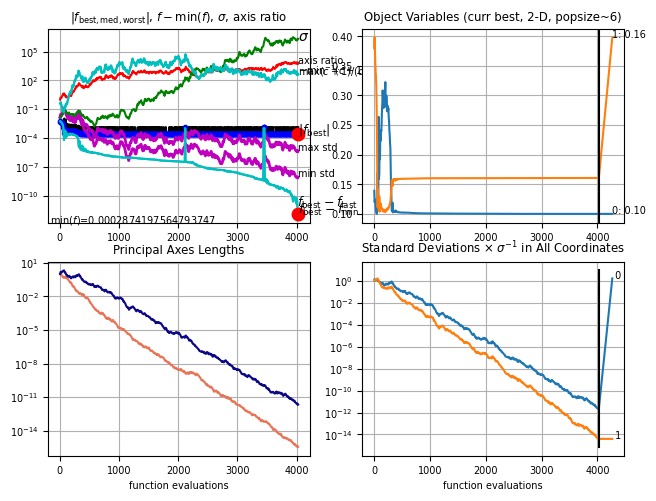

In [9]:
es.plot();

In [29]:
import numpy as np
import matplotlib.pyplot as plt
num_b = 30
num_h = 40

blist = np.linspace( 0.1, 0.2, num_b )
hlist = np.linspace( 0.1, 0.3, num_h )
B, H = np.meshgrid(blist, hlist)
np.shape(B)
Costs = np.zeros( (num_h, num_b) )
for j in range(num_b):
    for i in range(num_h):
        Costs[i,j]= costFun( [B[i,j],H[i,j]])

        

250.00000000000006
x:  [0.1, 0.1]  / Ast:  0.0004657305338541665  Asc:  0.00036309303385416653
262.8205128205129
x:  [0.1, 0.10512820512820513]  / Ast:  0.00041238403153378726  Asc:  0.0003022273007645565
275.6410256410257
x:  [0.1, 0.11025641025641027]  / Ast:  0.0003702003859576682  Asc:  0.00025252442441920666
288.46153846153845
x:  [0.1, 0.11538461538461539]  / Ast:  0.00033607880358573714  Asc:  0.00021088361127804482
301.28205128205127
x:  [0.1, 0.12051282051282051]  / Ast:  0.00030796960733218346  Asc:  0.00017525518425526038
314.1025641025641
x:  [0.1, 0.12564102564102564]  / Ast:  0.0002844636442005125  Asc:  0.00014422999035435867
326.92307692307696
x:  [0.1, 0.13076923076923078]  / Ast:  0.000264560211338141  Asc:  0.00011680732672275636
339.7435897435898
x:  [0.1, 0.13589743589743591]  / Ast:  0.0002475290661229137  Asc:  9.225695073829832e-05
352.5641025641026
x:  [0.1, 0.14102564102564102]  / Ast:  0.00023282483748258815  Asc:  7.003349132874201e-05
365.3846153846154
x:  

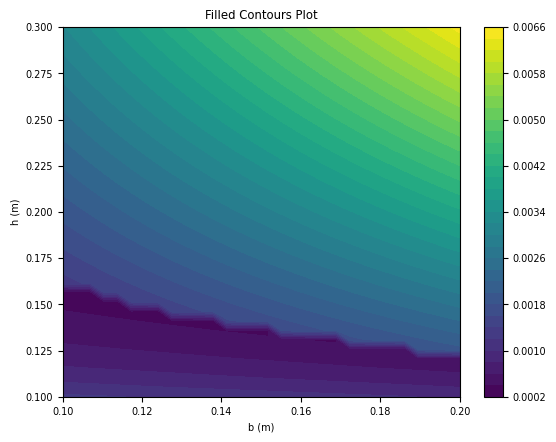

In [31]:

fig,ax=plt.subplots(1,1)
cp = ax.contourf(B, H, Costs,30)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours Plot')
ax.set_xlabel('b (m)')
ax.set_ylabel('h (m)')
plt.show()